In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\Abner Zhang\\Desktop\\default of credit card clients.csv",header=1)
data.head()
X = data.iloc[:,1:24]
y = data.iloc[:,24]


### 未使用SMOTE的算法

#### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

# 创建分类器
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# 训练数据
knn.fit(X_train, y_train)

# 测试数据
y_pred = knn.predict(X_test)

In [34]:
p = precision_score(y_test, y_pred)  
r = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)

print("precision is %.4f"%p)
print("recall is %.4f"%r)
print("f1 score is %.4f"%f1)

precision is 0.3958
recall is 0.1880
f1 score is 0.2549


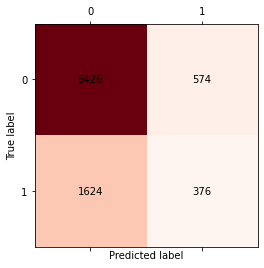

In [32]:
C = confusion_matrix(y_test, y_pred) # 可将'1'等替换成自己的类别，如'cat'。

plt.matshow(C, cmap=plt.cm.Reds) # 根据最下面的图按自己需求更改颜色
# plt.colorbar()

for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

clf = GaussianNB()
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [45]:
p = precision_score(y_test, y_pred)  
r = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)

print("precision is %.4f"%p)
print("recall is %.4f"%r)
print("f1 score is %.4f"%f1)

precision is 0.2491
recall is 0.8955
f1 score is 0.3898


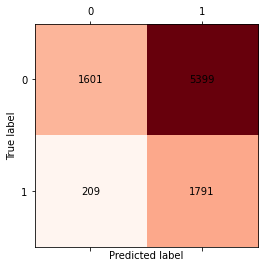

In [42]:
C = confusion_matrix(y_test, y_pred) # 可将'1'等替换成自己的类别，如'cat'。

plt.matshow(C, cmap=plt.cm.Reds) # 根据最下面的图按自己需求更改颜色
# plt.colorbar()

for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### SVM

In [3]:
from sklearn import svm

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [11]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
p = precision_score(y_test, y_pred)  
r = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)

print("precision is %.4f"%p)
print("recall is %.4f"%r)
print("f1 score is %.4f"%f1)

precision is 0.0000
recall is 0.0000
f1 score is 0.0000


C:\Users\Abner Zhang\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


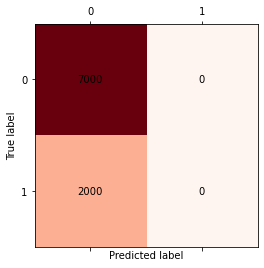

In [13]:
C = confusion_matrix(y_test, y_pred) # 可将'1'等替换成自己的类别，如'cat'。

plt.matshow(C, cmap=plt.cm.Reds) # 根据最下面的图按自己需求更改颜色
# plt.colorbar()

for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 需要SMOTE的算法

In [49]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [50]:
# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(X, y)

print(Counter(y_smo))
# Counter({0: 900, 1: 900})

X_train, X_test, y_train, y_test = train_test_split(
    X_smo, y_smo, test_size=0.7, random_state=1)

Counter({1: 23364, 0: 23364})
